##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
# read_csv will read in the info for the csv
new_voter_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested information about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



The purpose of my project is show how registered voters varies from different states and years. Voting is an important right and has shaped our future. I hope to use my skills in Python to help show trends in data that cannot be seen from raw data alone. It is important for other readers to visually see how many people register to vote and see what actions can be done to increase voter registration. My two questions I hope to answer for anyone reading this notebook is how do the total registered voters in 2016 compare to the total registered voters in 2020 and how many registered voters are there in Arizona based on the month.


## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [4]:
# head = defaults to the first 5
new_voter_df.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [5]:
# Checks for null values via the first notebook
new_voter_df.isnull().values.any()


False

Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [6]:
#dtypes will explain the data type for each column
new_voter_df.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [7]:
# rename() will make set new column names separated by a colon
# using head() to make sure changes are made permanently
new_voter_df=new_voter_df.rename(columns={"Jurisdiction":"NAME",
                     "New registered voters":"registered_voters"})

new_voter_df.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Explain any potential limitations to your data (2 points)

One limitation I see with this data is that it does not account for actual participation in elections,
rather the data only features new people who are registered to vote.
Many states are also not included in the data and would shift trends that we could potentially see in the data.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [8]:
# use loc to find rows that match the highest number of registered voters
# use idxmax to find the highest
new_voter_df.loc[new_voter_df["registered_voters"].idxmax()]

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


What is the average voter registration? (1 points)

In [9]:
# .mean() will calculate the mean
avg_voter_reg = new_voter_df["registered_voters"].mean()
avg_voter_reg

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [10]:
# create new df with every row having higher than average votes
# use len to see how many rows/spaces there are could also use count()
high_voters = new_voter_df[new_voter_df["registered_voters"] > avg_voter_reg.round()]
len(high_voters)

36

In [ ]:
high_voters.head(50)

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


How many times did each state go above the national average for new voter registration? (2 points)



In [11]:
# use groupby() to group by the name of the state and size() to find # of occurrences
high_voters.groupby("NAME").size().sort_values(ascending = False)

,0
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [12]:
# make a variable of the previous answer, then put 3 inside .head()
# to only show the top 3
top_three_states = high_voters.groupby("NAME").size().sort_values(ascending = False)
top_three_states.head(3)

,0
NAME,
Texas,8
California,7
Florida,7


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

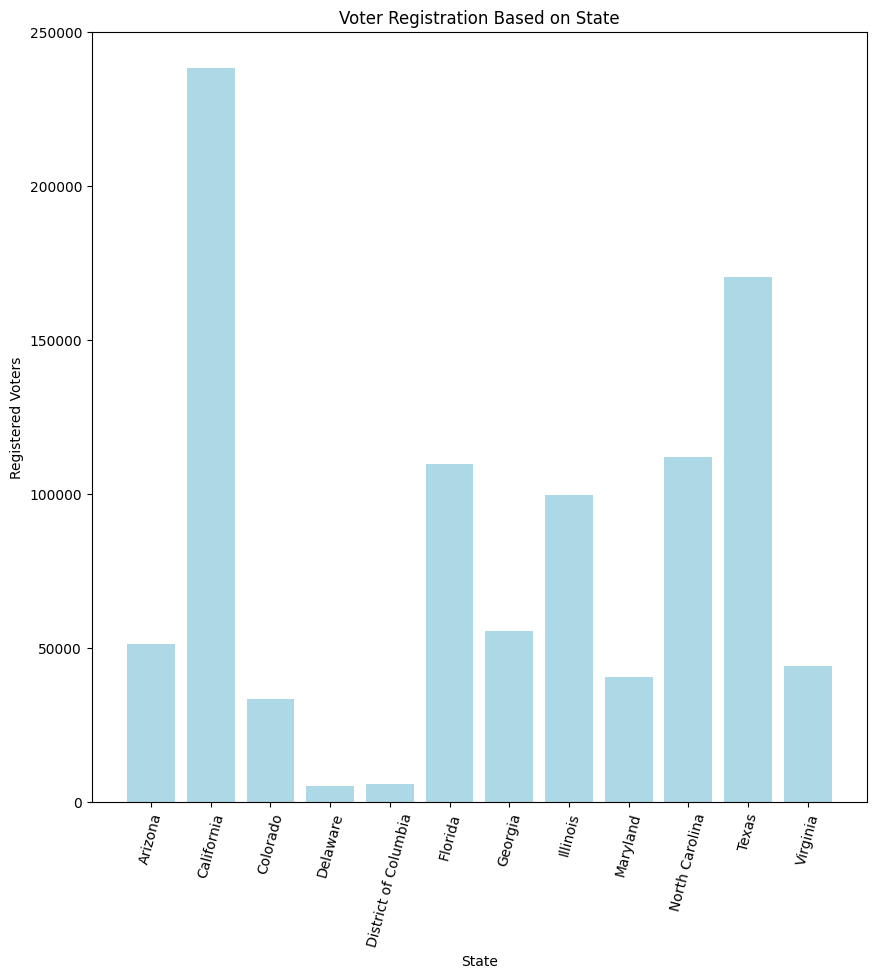

In [39]:
plt.figure(figsize=(10, 10))
plt.bar(new_voter_df["NAME"], new_voter_df["registered_voters"],color="lightblue")

plt.xlabel("State")
plt.ylabel("Registered Voters")
plt.title("Voter Registration Based on State")
plt.xticks(rotation=75)
plt.yticks()


plt.show()


It looks like as if more populated states tend to have the highest voter registration numbers and less populated states generally have smaller populations. The same could be said for physically larger states as they generally have higher voter registration. California and Texas have the highest voter registration and they are two of the three largest states. Alaska is the largest but it may have been conveniently left out as its population is not very high.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

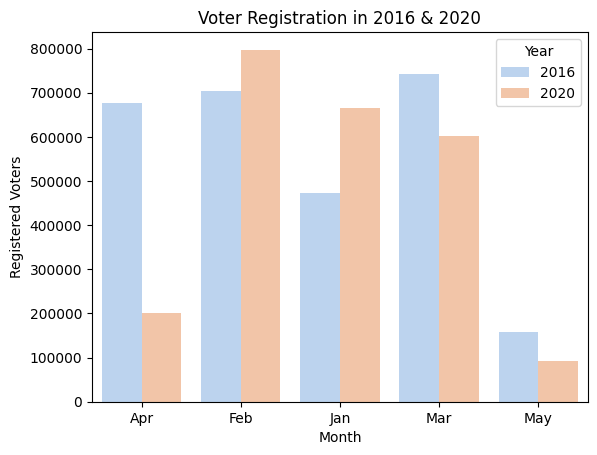

In [32]:
# Group the data together using groupby and resetindex make new variable
# Divide data by year for 2016 and 2020
grouped = new_voter_df.groupby(["Year", "Month"])["registered_voters"].sum().reset_index()
data_2016_2020 = grouped[grouped["Year"].isin([2016, 2020])]

# Remove Error Bar
sns.barplot(x="Month", y="registered_voters", hue="Year", dodge=True,
            data=data_2016_2020, palette="pastel", alpha=0.8, errorbar=None)


plt.xlabel("Month")
plt.ylabel("Registered Voters")
plt.title("Voter Registration in 2016 & 2020")


plt.show()

In 2020, in month order the number of registered voters decrease from January to May. January in 2016 is very low in comparison to 2020 and it increases by month until may where it drops very low. Both 2020 and 2016 data for May is much lower than the rest of the chart.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

<ipython-input-45-6093b98ab88d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_data["Month"] = arizona_data["Month"].astype(str)


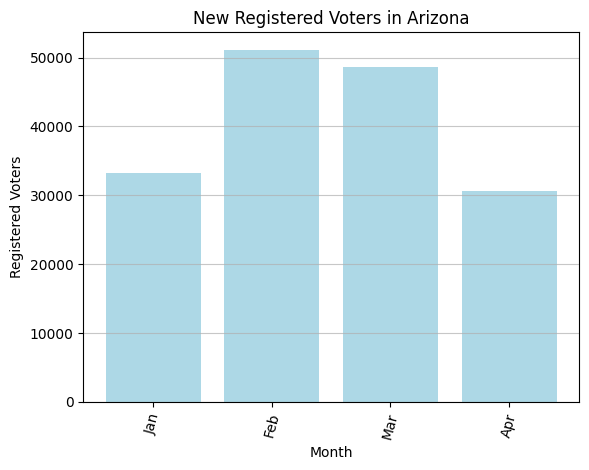

In [45]:
arizona_data = new_voter_df[new_voter_df["NAME"] == "Arizona"]
arizona_data["Month"] = arizona_data["Month"].astype(str)

plt.figure()
plt.bar(arizona_data["Month"], arizona_data["registered_voters"], color="lightblue")

plt.xlabel("Month")
plt.ylabel("Registered Voters")
plt.title("New Registered Voters in Arizona")
plt.xticks(rotation=75)
plt.grid(axis="y", alpha=0.7)

Most people in Arizona register to vote in the months of February and March. Less people do so in January and April. Compared to other states in the first graph, less people register to vote in Arizona compared to the other states with the exception of Delaware, DC, Maryland, and Virginia

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [16]:
# Loading in data via mapping unit
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [17]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


Set our continental US bounding box to us for the next questions. (2 points)

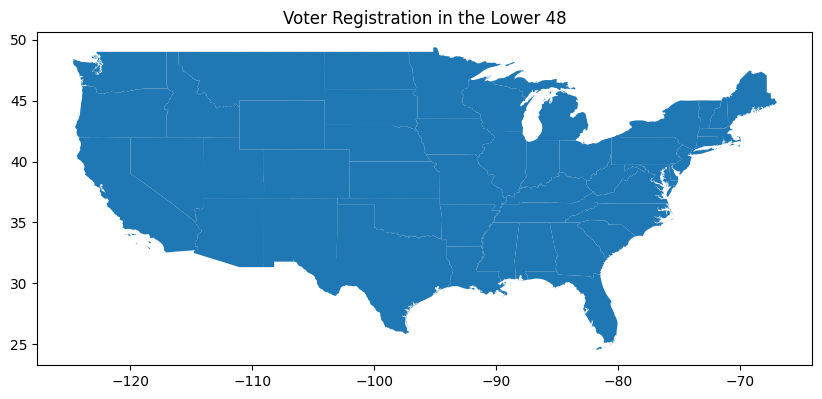

In [19]:
# Bounding of Lower 48 since Hawaii and Alaska are not apart of the set
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))
plt.title("Voter Registration in the Lower 48")
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [46]:
average_df = new_voter_df = new_voter_df.groupby("NAME")["registered_voters"].mean().reset_index()

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [47]:
try:
    states

    # Merge the voter registration data with the mapping data using an inner join
    merged_data = states.merge(average_df, left_on="NAME", right_on="State", how="inner")
except Exception as e:
    print(f"Error loading shapefile: {e}")

Error loading shapefile: 'State'


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentences.


To conclude my findings, voter registration decreased in 2020 for March, April and May due to rise of the Covid-19 shutting down registration offices. Voter registration will continue to increase in the coming years and states like Arizona should make it easier for new voters to register. Arizona's new registered voters could be lower due to laws that make it more difficult to register. It is ranked 14th in terms of state population, so I am surprised by the lack of participation.

My suggestions after performing data analysis is to set a campaign for states that have low voter registration to encourage more people to register. This can be done through advertisements and going door to door in neighboorhoods where there are lower populations of people eligible to vote. Advocate for laws that free restrictive policies that don't encourage immigrants to become naturalized so more people can participate in the upcoming elections.

If I continued to work on this project, I hope to also compare it to voter participation. There are many people who register to vote, but cannot seem to vote for a candidate. The approval for mainstream candidates were very low for both Kamala and Trump in the past election, so running data for participation can be key to answering questions on why certain individuals do not end up voting. There are also many restrictions for voter participation in certain states, so it would be fascinating to figure out how those states can increase participation and registration.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Shreyas Nair